   max_depth  accuracy  precision    recall        f1
0        2.0  0.798883   0.891304  0.569444  0.694915
1        3.0  0.754190   0.733333  0.611111  0.666667
2        5.0  0.731844   0.676471  0.638889  0.657143
3        7.0  0.748603   0.701493  0.652778  0.676259
4       10.0  0.765363   0.720588  0.680556  0.700000
5        NaN  0.726257   0.661972  0.652778  0.657343

Najlepsze max_depth: 10.0


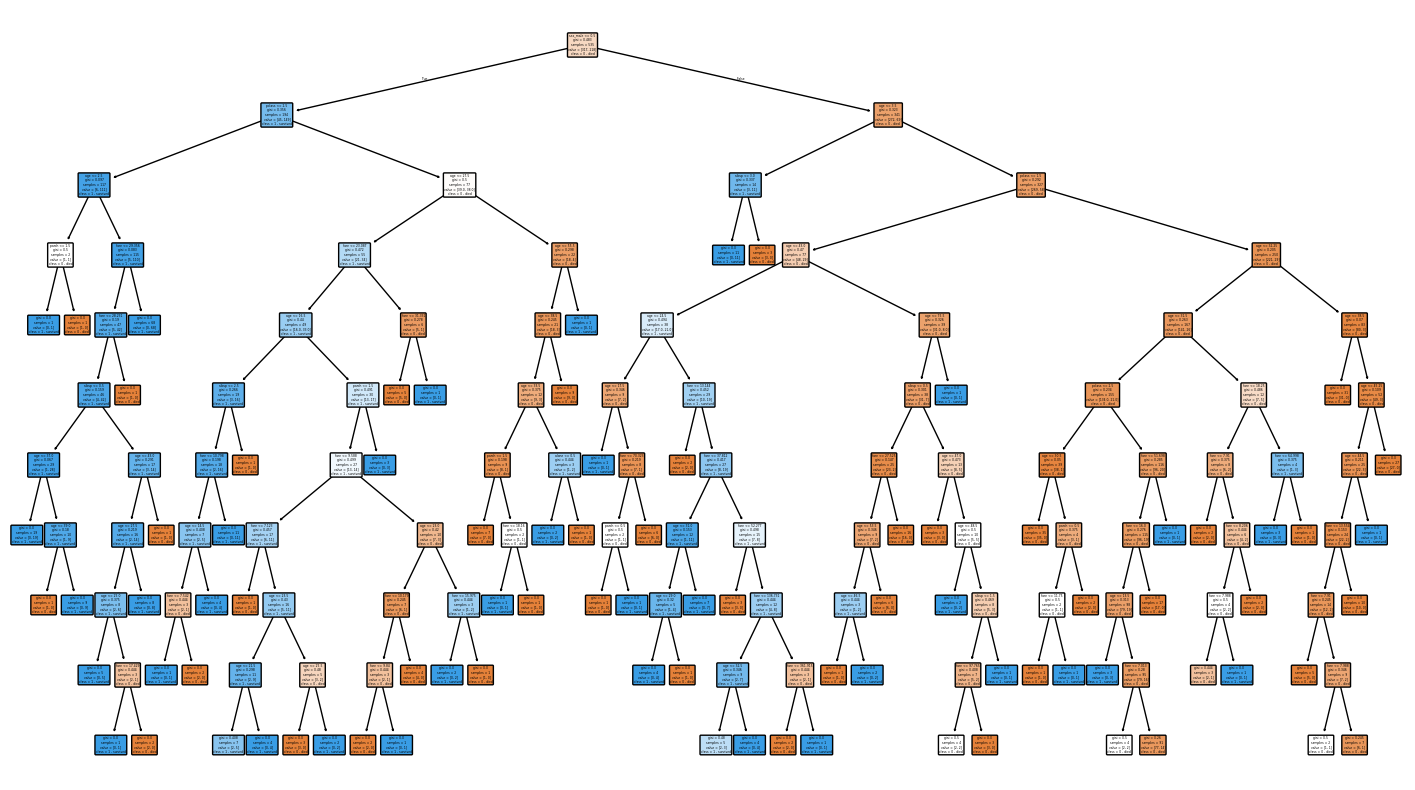

In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

titanic = sns.load_dataset("titanic")

df = titanic[['survived','pclass','sex','age','fare','sibsp','parch','alone']]

df = df.dropna()

# Zmienne kategoryczne → 0/1
df = pd.get_dummies(df, drop_first=True)

# Podział na X/y
X = df.drop("survived", axis=1)
y = df["survived"]

# Podział na train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

#Testowane max_depth
depth_values = [2, 3, 5, 7, 10, None]

results = []

for depth in depth_values:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy  = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)

    results.append([depth, accuracy, precision, recall, f1])

#Tabela wyników
result_df = pd.DataFrame(
    results,
    columns=["max_depth", "accuracy", "precision", "recall", "f1"]
)

print(result_df)

#Wybór najlepszego modelu (po F1 lub accuracy)
best_idx = result_df["f1"].idxmax()
best_depth = result_df.loc[best_idx, "max_depth"]
print("\nNajlepsze max_depth:", best_depth)

#Konwersja do int
if best_depth is not None:
    best_depth = int(best_depth)

#Trenowanie finalnego modelu
best_model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
best_model.fit(X_train, y_train)

#Wizualizacja najlepszego drzewa
plt.figure(figsize=(18, 10))
plot_tree(
    best_model,
    feature_names=X.columns,
    class_names=["0 - died", "1 - survived"],
    filled=True,
    rounded=True
)
plt.show()

W przypadku zbioru Titanic, który nie jest do końca zbalansowany najlepszym parametrem wybour będzie f1, które zapewania balans pomiędzy precision a recall, dlatego wybrane max_depth = 10 ( największe f1 )

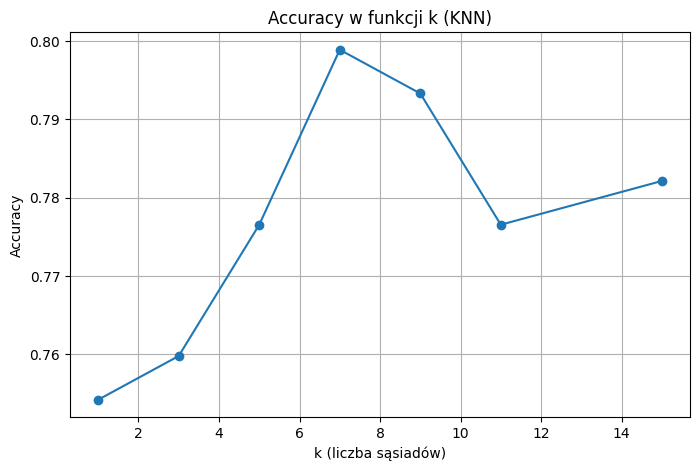

Najlepsze k = 7
Accuracy dla najlepszego k = 0.7988826815642458


In [5]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

titanic = sns.load_dataset("titanic")

df = titanic[['survived','pclass','sex','age','fare','sibsp','parch','alone']]
df = df.dropna()

df = pd.get_dummies(df, drop_first=True)

X = df.drop("survived", axis=1)
y = df["survived"]

#Normalizacja cech
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42
)

k_values = [1, 3, 5, 7, 9, 11, 15]
accuracies = []

#Trenowanie i testowanie modeli KNN
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

#Wykres accuracy = f(k)
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy w funkcji k (KNN)")
plt.xlabel("k (liczba sąsiadów)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

#Wybór najlepszego k
best_idx = np.argmax(accuracies)
best_k = k_values[best_idx]
best_acc = accuracies[best_idx]

print("Najlepsze k =", best_k)
print("Accuracy dla najlepszego k =", best_acc)